In [ ]:
listaAdj = {
            'Arad': {'Sibiu': 140, 'Zerind': 75, 'Timisoara': 118},
            'Zerind': {'Arad': 75, 'Oradea': 71},
            'Oradea': {'Zerind': 71, 'Sibiu': 151},
            'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu': 80},\
            'Timisoara': {'Arad': 118, 'Lugoj': 111},
            'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
            'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
            'Dobreta': {'Mehadia': 75, 'Craiova': 120},
            'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
            'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
            'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
            'Pitesti': {'Rimnicu': 97, 'Craiova': 138, 'Bucharest': 101},
            'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
            'Giurgiu': {'Bucharest': 90},
            'Urziceni': {'Bucharest': 85, 'Vaslui': 142, 'Hirsova': 98},
            'Hirsova': {'Urziceni': 98, 'Eforie': 86},
            'Eforie': {'Hirsova': 86},
            'Vaslui': {'Iasi': 92, 'Urziceni': 142},
            'Iasi': {'Vaslui': 92, 'Neamt': 87},
            'Neamt': {'Iasi': 87}
        }


In [ ]:
listaAdj['Arad']['Timisoara']

118

In [ ]:
# HERE THE STRAIGHT LINE DISTANCE VALUES ARE IN REFERENCE TO BUCHAREST AS THE DESTINATION
straight_line = {
                        'Arad': 366,
                        'Zerind': 374,
                        'Oradea': 380,
                        'Sibiu': 253,
                        'Timisoara': 329,
                        'Lugoj': 244,
                        'Mehadia': 241,
                        'Dobreta': 242,
                        'Craiova': 160,
                        'Rimnicu': 193,
                        'Fagaras': 176,
                        'Pitesti': 100,
                        'Bucharest': 0,
                        'Giurgiu': 77,
                        'Urziceni': 80,
                        'Hirsova': 151,
                        'Eforie': 161,
                        'Vaslui': 199,
                        'Iasi': 226,
                        'Neamt': 234
                    }

In [ ]:
import networkx as nx
# Fonte https://www.geeksforgeeks.org/visualize-graphs-in-python/
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        #plt.show()

In [ ]:
def a_star(source, destination, graph):
    """Optimal path from source to destination using straight line distance heuristic
    :param source: Source city name
    :param destination: Destination city name
    :param graph: Create a graph for visualization
    :returns: Heuristic value, cost and path for optimal traversal
    """
    
    from queue import PriorityQueue
    priority_queue, visited = PriorityQueue(), {}   
    priority_queue.put((straight_line[source], 0, source, [source]))
    visited[source] = straight_line[source]
    while not priority_queue.empty():
        (heuristic, cost, city, path) = priority_queue.get()
        print(city)
        print(destination)
        if city == destination:
            return heuristic, cost, path
        
        #Visit all adjacent cities from current vertex    
        for next_city in listaAdj[city].keys():
            graph.addEdge(city, next_city)            
            current_cost = cost + listaAdj[city][next_city]
            heuristic = current_cost + straight_line[next_city]
            if not next_city in visited or visited[next_city] >= heuristic:
                print(next_city)
                print(heuristic)                
                visited[next_city] = heuristic
                priority_queue.put((heuristic, current_cost, next_city, path + [next_city]))     


A Estrela:
Arad
Bucharest
Sibiu
393
Zerind
449
Timisoara
447
Sibiu
Bucharest
Oradea
671
Fagaras
415
Rimnicu
413
Rimnicu
Bucharest
Craiova
526
Pitesti
417
Fagaras
Bucharest
Bucharest
450
Pitesti
Bucharest
Bucharest
418
Bucharest
Bucharest
['Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']
418


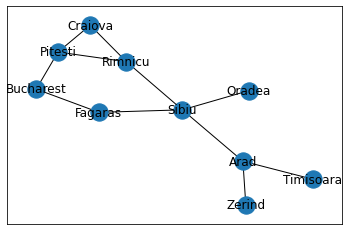

In [ ]:
print('\nA Estrela:')
G = GraphVisualization()
heuristic, cost, optimal_path = a_star('Arad', 'Bucharest', G)
print(optimal_path)
print(heuristic)
G.visualize()

In [ ]:
from queue import PriorityQueue
customers = PriorityQueue() #we initialise the PQ class instead of using a function to operate upon a list. 
customers.put((366, 0, 'Arad', ['Arad']))
customers.put((393, 140, 'Sibiu', ['Arad', 'Sibiu']))
customers.put((449, 75, 'Zerind', ['Arad', 'Zerind']))
customers.put((447, 118, 'Timisoara', ['Arad', 'Timisoara']))
customers.put((671, 291, 'Oradea', ['Arad', 'Sibiu', 'Oradea']))
customers.put((415, 239, 'Fagaras', ['Arad', 'Sibiu', 'Fagaras']))
customers.put((413, 220, 'Rimnicu', ['Arad', 'Sibiu', 'Rimnicu']))
customers.put((526, 366, 'Craiova', ['Arad', 'Sibiu', 'Rimnicu', 'Craiova']))
customers.put((417, 317, 'Pitesti', ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti']))
customers.put((450, 450, 'Bucharest', ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']))
while not customers.empty():
     print(customers.get())


(366, 0, 'Arad', ['Arad'])
(393, 140, 'Sibiu', ['Arad', 'Sibiu'])
(413, 220, 'Rimnicu', ['Arad', 'Sibiu', 'Rimnicu'])
(415, 239, 'Fagaras', ['Arad', 'Sibiu', 'Fagaras'])
(417, 317, 'Pitesti', ['Arad', 'Sibiu', 'Rimnicu', 'Pitesti'])
(447, 118, 'Timisoara', ['Arad', 'Timisoara'])
(449, 75, 'Zerind', ['Arad', 'Zerind'])
(450, 450, 'Bucharest', ['Arad', 'Sibiu', 'Fagaras', 'Bucharest'])
(526, 366, 'Craiova', ['Arad', 'Sibiu', 'Rimnicu', 'Craiova'])
(671, 291, 'Oradea', ['Arad', 'Sibiu', 'Oradea'])
